In [ ]:
# Research Silhouette score

In [ ]:
!pip install yellowbrick

In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import time
from yellowbrick.cluster import SilhouetteVisualizer

In [13]:
df = pd.read_csv("data/winequality-red.csv", sep=';')
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
X = df[df.columns[:-1]]
X = (X - X.mean()) / X.std()
y = df[df.columns[-1]] # These will be thrown away in most cases and only used for evaluation in this notebook

## Clustering

### K Means

#### Number of Cluster Experiments

In [15]:
kmeans_results = []
times = []
index = np.arange(1, 20, 1)
for i in index:
    start = time.time()
    kmeans_results.append(KMeans(n_clusters=i).fit(X))
    times.append(time.time() - start)

In [16]:
kmeans_results[0].labels_

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
kmeans_elbow_df = pd.DataFrame(index=index)
kmeans_elbow_df['score'] = [res.inertia_ for res in kmeans_results]

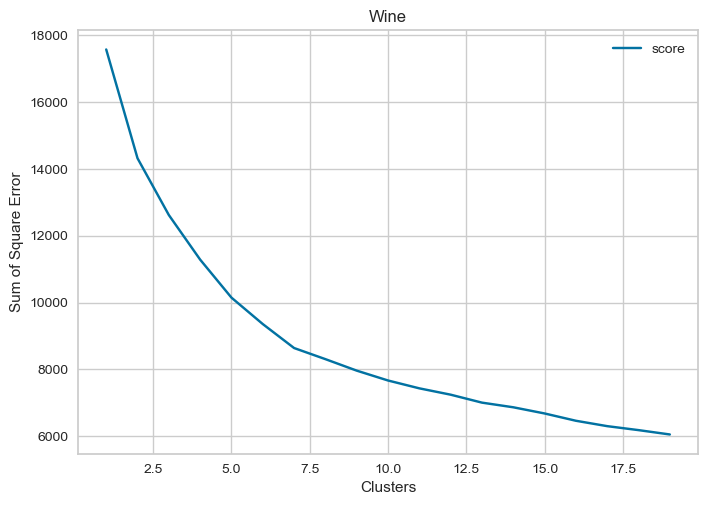

In [24]:
kmeans_elbow_df.plot(xlabel='Clusters', ylabel='Sum of Square Error', title='Wine')
plt.savefig('winekmeanselbow', format='png')
plt.show()

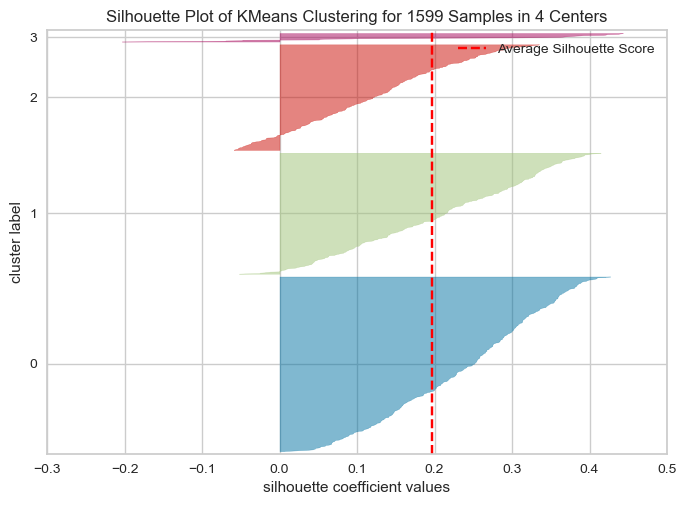

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1599 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
plt.savefig('winekmeanssilhouettefinal', format='png')
visualizer.show()

In [20]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [21]:
time_df.plot(xlabel='Clusters', ylabel='Fit Time', title='Wine')
plt.savefig('winekmeanstime', format='png')

#### Number of Cluster Validation

In [25]:
k=4

In [26]:
start = time.time()
KMeans(n_clusters=5).fit(X)
print(time.time() - start)

0.23221039772033691


In [27]:
kmeans = KMeans(n_clusters=k).fit(X)

In [28]:
kmeans_pairwise = X.copy()
kmeans_pairwise['kmeans_labels'] = kmeans.labels_
kmeans_pairwise.head()
kmeans_pairwise['labels'] = y

In [29]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 0].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kmeans_labels,labels
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.0,375.000000
mean,-0.090003,0.030788,0.097387,0.393397,-0.007023,1.084344,1.314763,0.278270,-0.170783,-0.179907,-0.511567,0.0,5.344000
std,0.636968,0.898178,0.712893,1.568476,0.527311,1.040184,0.947268,0.934482,0.754253,0.858115,0.699279,0.0,0.599964
min,-1.562026,-1.942483,-1.391037,-1.162333,-1.603443,-1.039652,-0.257416,-3.537625,-2.727656,-1.581934,-1.804487,0.0,3.000000
25%,-0.528194,-0.630072,-0.313015,-0.382151,-0.243630,0.394361,0.624168,-0.236672,-0.654936,-0.756009,-0.959946,0.0,5.000000
50%,-0.241019,0.068019,0.046326,-0.098449,-0.116148,0.967966,1.201758,0.240191,-0.136755,-0.402042,-0.772270,0.0,5.000000
75%,0.333332,0.570645,0.508336,0.256179,0.128193,1.637172,1.870546,0.751494,0.316652,0.128910,-0.256162,0.0,6.000000
max,1.998949,3.977330,2.613046,9.121880,3.155902,5.365606,7.372847,3.678904,1.871193,5.674404,2.324380,0.0,8.000000


In [30]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 1].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kmeans_labels,labels
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000
mean,1.033082,-0.738393,1.016012,0.052490,-0.065996,-0.495524,-0.531835,0.426135,-0.676257,0.361201,0.374247,1.0,6.020833
std,0.954226,0.672155,0.598919,0.893973,0.582711,0.653911,0.485698,1.038370,0.743061,0.879604,0.997453,0.0,0.832271
min,-1.102545,-2.277567,-0.826359,-0.878630,-1.051019,-1.422055,-1.230199,-1.836813,-2.921974,-1.404950,-1.898325,1.0,3.000000
25%,0.333332,-1.216469,0.662339,-0.382151,-0.413607,-0.944051,-0.895805,-0.383705,-1.108343,-0.284052,-0.396918,1.0,5.000000
50%,0.965118,-0.825538,1.021680,-0.169374,-0.179889,-0.657248,-0.683009,0.425638,-0.654936,0.246899,0.353785,1.0,6.000000
75%,1.654339,-0.378759,1.342520,0.114328,0.117570,-0.179244,-0.196617,1.087948,-0.201528,0.836846,1.104488,1.0,7.000000
max,4.353787,2.022674,2.664381,9.192806,3.453361,2.115176,1.596951,3.419279,1.482557,5.320437,4.201138,1.0,8.000000


In [31]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 2].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kmeans_labels,labels
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.0,716.000000
mean,-0.649161,0.478801,-0.778322,-0.225986,-0.178227,-0.233787,-0.352011,-0.438458,0.610661,-0.291138,0.051040,2.0,5.541899
std,0.512159,0.941888,0.574296,0.518102,0.498901,0.729313,0.579607,0.833040,0.855348,0.673516,1.021635,0.0,0.796621
min,-2.136377,-1.719094,-1.391037,-0.949556,-1.136008,-1.230854,-1.199799,-3.468744,-1.496978,-1.935902,-1.335297,2.0,3.000000
25%,-0.987675,-0.099523,-1.288368,-0.524002,-0.434854,-0.848450,-0.804607,-0.917527,0.057562,-0.697015,-0.772270,2.0,5.000000
50%,-0.643065,0.403103,-0.929027,-0.311225,-0.222383,-0.370446,-0.470212,-0.332045,0.510970,-0.402042,-0.209243,2.0,6.000000
75%,-0.341530,0.961576,-0.364349,-0.098449,-0.031160,0.107558,-0.044620,0.093158,1.110115,0.010921,0.635298,2.0,6.000000
max,0.677942,5.876138,1.997033,3.731534,3.814561,3.071185,1.809747,1.856227,4.526866,3.196630,3.356597,2.0,8.000000


In [32]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 3].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kmeans_labels,labels
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.000000
mean,0.095386,0.002199,1.181183,-0.389750,5.782951,-0.049500,0.510170,0.180016,-1.735249,3.662266,-0.869459,3.0,5.357143
std,0.440950,0.846701,1.026150,0.333420,2.667729,0.615296,1.040039,0.385048,0.767018,2.078677,0.379226,0.0,0.621485
min,-0.585629,-1.830789,-0.467018,-0.807705,0.478770,-1.039652,-1.108601,-0.273761,-3.699244,0.069915,-1.335297,3.0,4.000000
25%,-0.298454,-0.504416,0.084827,-0.594928,5.275297,-0.418246,-0.097819,-0.104210,-2.015158,2.488695,-1.147622,3.0,5.000000
50%,0.161027,-0.211217,1.227017,-0.488539,6.172986,0.011958,0.472171,0.113028,-1.788455,3.019646,-0.959946,3.0,5.000000
75%,0.333332,0.598568,2.099702,-0.382151,6.959128,0.298760,0.684967,0.253437,-1.286468,4.052052,-0.725351,3.0,6.000000
max,1.539468,1.408354,3.742403,0.681733,11.123555,1.541571,2.721730,1.511826,-0.071983,7.916200,0.072271,3.0,7.000000


In [33]:
np.corrcoef(kmeans.labels_, y)

array([[1.        , 0.02469975],
       [0.02469975, 1.        ]])

In [38]:
to_show = ['fixed acidity', 'chlorides', 'alcohol']

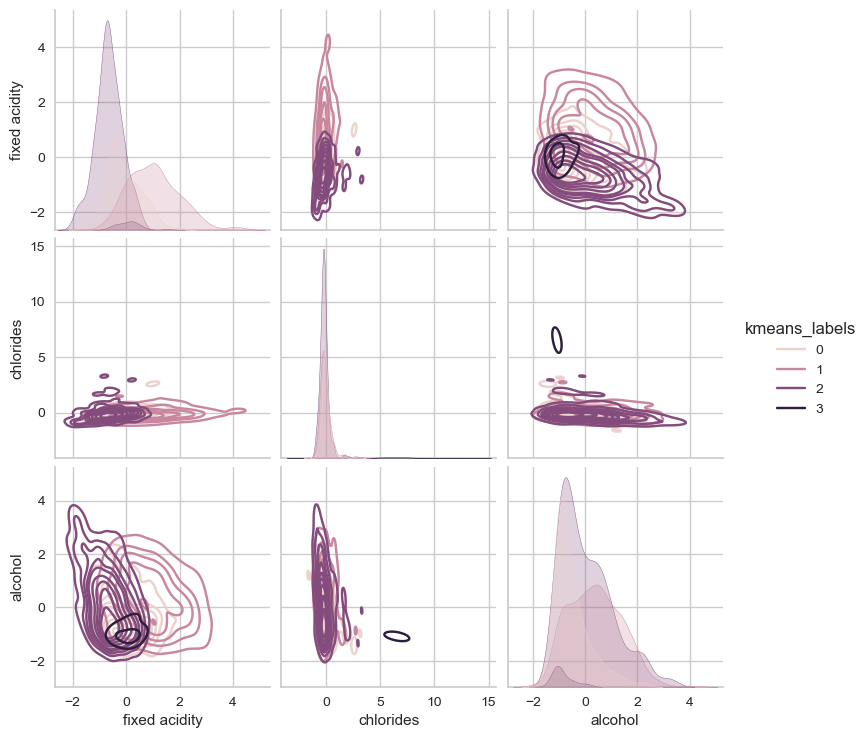

In [42]:
sns.pairplot(kmeans_pairwise[to_show + ['kmeans_labels']], hue='kmeans_labels', kind='kde')
plt.savefig('winekmeanspairwise')
plt.show()

### Expectation Maximization

In [ ]:
## Look at AIC and BIC for other metrics

In [51]:
em_results = []
times = []
index = np.arange(1, 20, 1)
for i in index:
    start = time.time()
    em_results.append(GaussianMixture(n_components=i).fit(X))
    times.append(time.time() - start)

In [52]:
em_results[0].weights_

array([1.])

In [53]:
em_results[0].converged_

True

In [54]:
em_elbow_df = pd.DataFrame(index=index)
em_elbow_df['score'] = [res.score(X) for res in em_results]

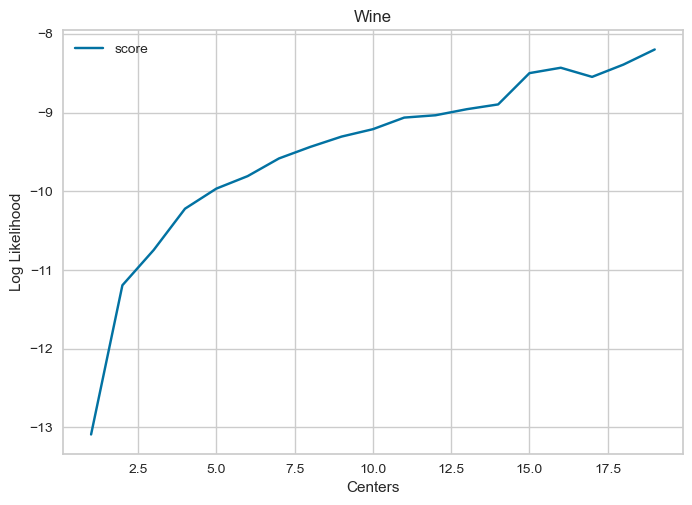

In [55]:
em_elbow_df.plot(xlabel='Centers', ylabel='Log Likelihood', title='Wine')
plt.savefig('wineemelbow', format='png')

In [56]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

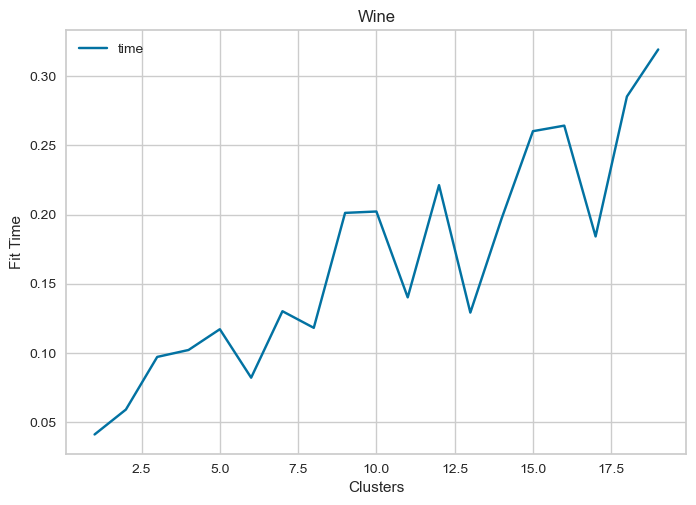

In [57]:
time_df.plot(xlabel='Clusters', ylabel='Fit Time', title='Wine')
plt.savefig('wineemtime', format='png')

#### Number of Gaussians Validation

In [58]:
k=3

In [59]:
start = time.time()
em_results = GaussianMixture(n_components=5).fit(X)
print(time.time() - start)

0.09308362007141113


In [60]:
em_results = GaussianMixture(n_components=k).fit_predict(X)
em_results

array([0, 1, 0, ..., 0, 0, 2], dtype=int64)

In [61]:
np.corrcoef(em_results, y)

array([[ 1.       , -0.0728505],
       [-0.0728505,  1.       ]])

In [62]:
em_pairwise = X.copy()
em_pairwise['em_labels'] = em_results
em_pairwise['labels'] = y
em_pairwise.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,em_labels,labels
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,0,5
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,1,5
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,0,5
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0,6
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,0,5


In [63]:
em_pairwise[em_pairwise['em_labels'] == 0].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,em_labels,labels
count,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.0,1075.000000
mean,0.027563,-0.151915,-0.038865,-0.266856,-0.219182,-0.096449,-0.327264,-0.044887,0.077807,-0.076117,0.029862,0.0,5.707907
std,0.975851,0.900099,0.987039,0.298956,0.283484,0.912649,0.586418,0.912410,0.918362,0.728937,0.925458,0.0,0.781706
min,-1.791766,-2.277567,-1.391037,-0.949556,-1.051019,-1.422055,-1.230199,-2.779942,-2.921974,-1.935902,-1.898325,0.0,3.000000
25%,-0.700500,-0.853461,-0.980362,-0.453077,-0.413607,-0.848450,-0.774207,-0.660550,-0.525391,-0.579025,-0.772270,0.0,5.000000
50%,-0.183584,-0.155370,-0.107677,-0.311225,-0.222383,-0.274845,-0.439813,-0.045927,0.122335,-0.225058,-0.115405,0.0,6.000000
75%,0.563072,0.458950,0.765008,-0.098449,-0.052407,0.394361,0.046578,0.526309,0.640515,0.364889,0.635298,0.0,6.000000
max,3.434826,2.860384,2.459043,0.681733,0.733735,3.644790,2.022543,2.465552,3.037098,2.783668,3.356597,0.0,8.000000


In [64]:
em_pairwise[em_pairwise['em_labels'] == 1].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,em_labels,labels
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.0,348.000000
mean,-0.470264,0.628257,-0.352991,0.632513,-0.021940,0.470869,1.065135,-0.173775,0.159374,-0.403059,-0.163582,1.0,5.376437
std,0.669383,1.101353,0.792552,1.763600,0.621631,1.156777,1.242579,1.139236,1.114232,0.641330,1.101438,0.0,0.762384
min,-2.136377,-1.942483,-1.391037,-1.162333,-1.603443,-1.230854,-1.199799,-3.537625,-2.727656,-1.581934,-1.522973,1.0,3.000000
25%,-0.872805,-0.043675,-1.031696,-0.382151,-0.312683,-0.370446,0.190976,-0.618163,-0.590163,-0.815004,-0.959946,1.0,5.000000
50%,-0.470759,0.458950,-0.364349,-0.098449,-0.116148,0.203159,1.232157,-0.130702,-0.007210,-0.520031,-0.584594,1.0,5.000000
75%,-0.068714,1.101194,0.097661,0.983167,0.165376,1.063567,1.809747,0.457429,0.834832,-0.151314,0.447623,1.0,6.000000
max,1.367163,5.876138,2.613046,9.192806,3.134654,5.365606,7.372847,3.678904,4.526866,2.842663,3.356597,1.0,8.000000


In [65]:
em_pairwise[em_pairwise['em_labels'] == 2].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,em_labels,labels
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0,176.000000
mean,0.761484,-0.314344,0.935345,0.379292,1.382133,-0.341929,-0.107146,0.617768,-0.790369,1.261875,0.141050,2.0,5.710227
std,1.170916,0.853254,0.877445,1.018806,2.377968,0.866414,1.016809,0.996289,0.881893,1.759214,1.179363,0.0,0.938758
min,-1.332285,-1.942483,-1.391037,-0.949556,-0.881043,-1.422055,-1.169400,-1.773231,-3.699244,-0.991988,-1.898325,2.0,3.000000
25%,-0.126149,-0.895347,0.290165,-0.453077,-0.116148,-0.944051,-0.895805,-0.080367,-1.513171,-0.062822,-0.866108,2.0,5.000000
50%,0.534355,-0.490454,1.124349,-0.098449,0.415029,-0.561648,-0.485412,0.359407,-0.654936,0.895840,-0.209243,2.0,6.000000
75%,1.438957,0.249523,1.445189,1.036361,1.742971,0.107558,0.411372,1.193917,-0.136755,2.193722,1.104488,2.0,6.000000
max,4.353787,2.273987,3.742403,3.518757,11.123555,2.975584,3.299320,3.419279,1.093922,7.916200,4.201138,2.0,8.000000


In [66]:
to_show = ['fixed acidity', 'chlorides', 'alcohol']

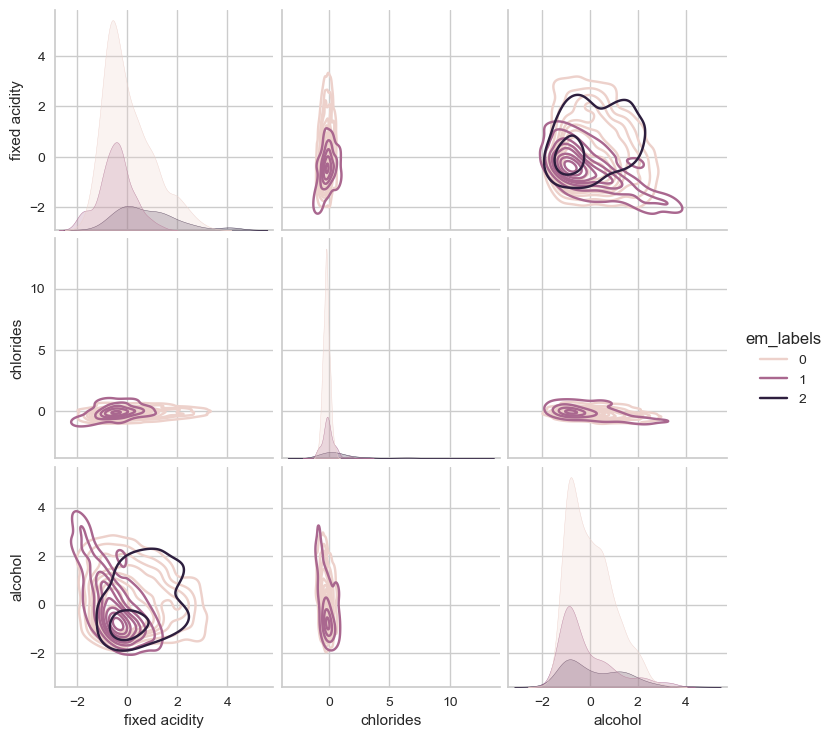

In [69]:
sns.pairplot(em_pairwise[to_show + ['em_labels']], hue='em_labels', kind='kde')
plt.savefig('wineempairwise')

## Dimensionality Reduction

### Component Choices



### PCA Component Choice

In [70]:
from sklearn.decomposition import PCA, FastICA

In [196]:
pca_results = []
times = []
index = np.arange(1, 11, 1) # number of features is 11
for i in index:
    start = time.time()
    pca_results.append(PCA(n_components=i).fit(X))
    times.append(time.time() - start)
pca_results = PCA(n_components=11).fit(X)

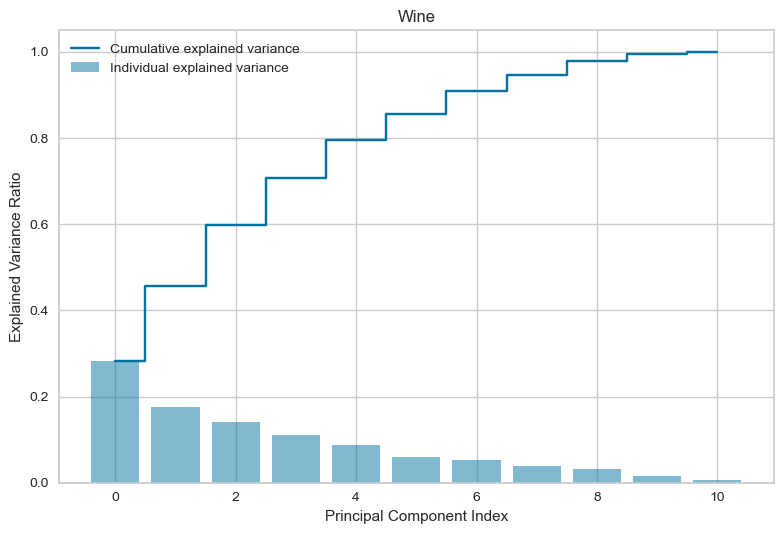

In [198]:
plt.bar(range(0,len(pca_results.explained_variance_ratio_)), pca_results.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(np.cumsum(pca_results.explained_variance_ratio_))), np.cumsum(pca_results.explained_variance_ratio_), where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Wine')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('winepcacomponent')
plt.show()

In [73]:
pca_results.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

In [74]:
np.cumsum(pca_results.explained_variance_ratio_)

array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
       0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
       1.        ])

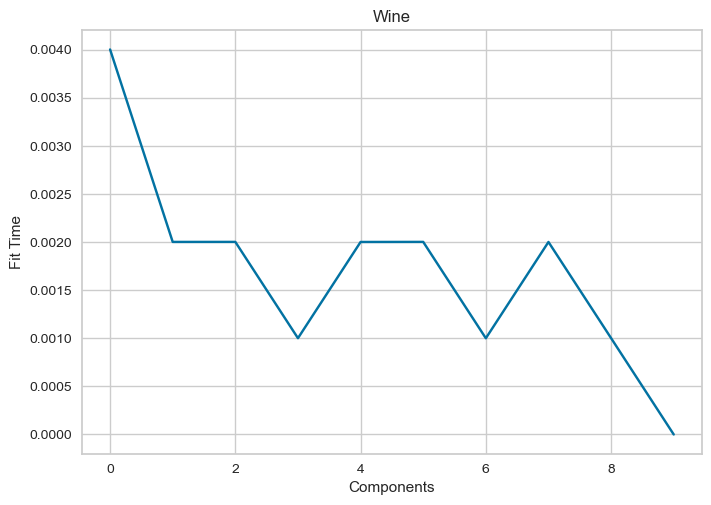

In [75]:
plt.title('Wine')
plt.xlabel('Components')
plt.ylabel('Fit Time')
plt.plot(times)
plt.savefig('winepcafittime', format='png')

In [221]:
%%time
pca_results = PCA(n_components=7).fit(X)

CPU times: total: 46.9 ms
Wall time: 17 ms


In [77]:
component_makeup_df = pd.DataFrame(data=pca_results.components_, columns=X.columns)

In [78]:
component_makeup_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
1,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181


### ICA Component Choice

In [ ]:
## Need to watch the lecture on this one to understand kurtosis more

In [120]:
from scipy.stats import kurtosis

In [199]:
ica_results = []
times = []
index = np.arange(1, 20, 1) # number of features is 11
for i in index:
    start = time.time()
    ica = FastICA(n_components=i).fit_transform(X)
    df = pd.DataFrame(data=ica).kurt()
    ica_results.append(df.mean())
    times.append(time.time() - start)

In [200]:
ica_results

[0.3188114095931103,
 0.9091103686923887,
 1.110914263431877,
 9.003186526852181,
 10.83065365330464,
 10.21321260353156,
 10.866198743321911,
 12.421289750954566,
 11.797259327699805,
 11.288496971052991,
 11.029528700018354,
 11.06417339336449,
 10.686894063435536,
 10.683698267802486,
 11.034372010433074,
 11.125289938645489,
 11.122388522446599,
 11.121051684204463,
 11.034715762603021]

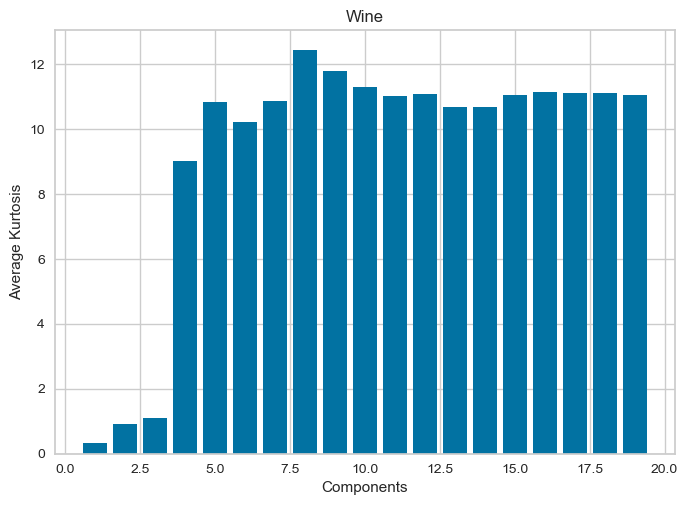

In [201]:
plt.title('Wine')
plt.xlabel('Components')
plt.ylabel('Average Kurtosis')
plt.bar(np.arange(1,20,1), ica_results)
plt.savefig('wineicacomponent')

In [222]:
%%time
ica = FastICA(n_components=8).fit(X)

CPU times: total: 125 ms
Wall time: 8.01 ms


In [125]:
pd.DataFrame(data=ica.transform(X)).kurt()

0    -0.785561
1    -0.091785
2    45.798066
3    29.564740
4     1.276383
5     3.942447
6     1.742815
7    17.918114
dtype: float64

In [126]:
component_makeup_df = pd.DataFrame(data=ica.components_, columns=X.columns)

In [127]:
(component_makeup_df - component_makeup_df.mean()) / component_makeup_df.std()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.219855,1.031429,-1.410740,0.510996,0.577038,-0.373962,0.350903,-0.814035,-0.569558,-0.569633,-0.798160
1,-0.323490,-1.004705,1.202925,-0.331828,0.665011,1.965984,1.183795,1.291606,1.370728,-0.453214,-0.557080
2,0.147266,-0.538777,-0.435492,0.537587,-2.192149,-0.008074,0.081853,-0.321628,-0.140480,-0.499797,0.280550
3,0.529691,0.090485,0.708175,-2.367742,0.447339,0.149164,-0.085576,-1.046168,0.046554,-0.396714,0.335614
4,0.273012,-0.813281,0.333684,0.439538,0.183016,-1.054129,-0.417822,0.119558,-1.158719,-0.656216,-1.224563
5,-0.671056,-0.534489,-0.013663,0.533816,0.496530,-1.219978,-2.164124,1.320133,1.457958,0.554417,-0.044953
6,2.007135,1.913229,0.966438,0.225181,0.591127,0.607298,0.365492,0.609346,0.129226,-0.270514,2.086530
7,-0.742702,-0.143891,-1.351327,0.452452,-0.767912,-0.066302,0.685479,-1.158811,-1.135709,2.291672,-0.077938


### RP Component Choice

In [ ]:
# https://stats.stackexchange.com/questions/194278/meaning-of-reconstruction-error-in-pca-and-lda

In [152]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import r2_score, mean_squared_error

In [207]:
rp_results = []
times = []
index = np.arange(1, 20, 1) # number of features is 11
for i in index:
    start = time.time()
    rp = GaussianRandomProjection(n_components=i).fit(X)
    rp_results.append(mean_squared_error(X, rp.inverse_transform(rp.transform(X))))
    times.append(time.time() - start)

In [208]:
rp_results

[0.9253884662003281,
 0.8323888876082598,
 0.7442733657626998,
 0.691934961432921,
 0.47998215647135145,
 0.535533666367142,
 0.3582498568188122,
 0.25618602412693814,
 0.2092799793663094,
 0.08259588929867413,
 6.258566225613532e-30,
 7.317689817148563e-30,
 5.081199336223981e-30,
 1.4166101313042562e-30,
 1.0331386509365929e-30,
 1.7821781884078042e-30,
 1.865390407108618e-30,
 1.9461969868763925e-30,
 1.0642936162317298e-30]

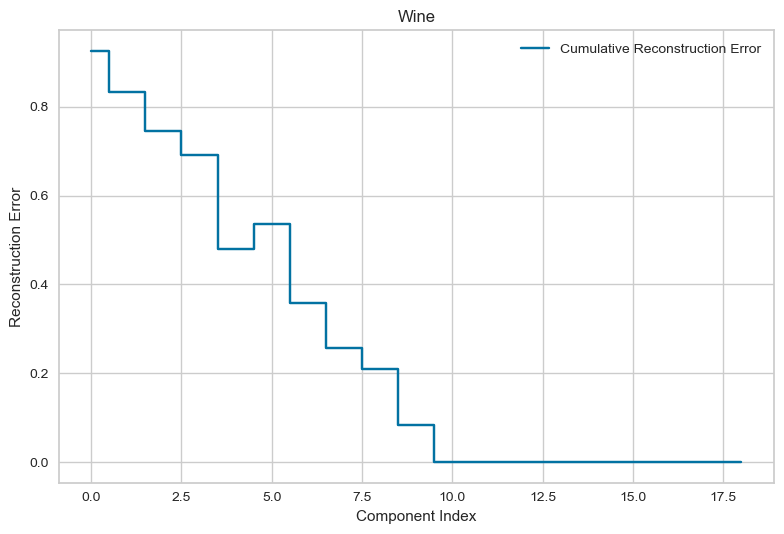

In [209]:
plt.step(range(0,len(np.cumsum(rp_results))), rp_results, where='mid',label='Cumulative Reconstruction Error')
plt.ylabel('Reconstruction Error')
plt.xlabel('Component Index')
plt.title('Wine')
plt.legend(loc='best')
plt.savefig('winerpcomponent')
plt.tight_layout()
plt.show()

In [223]:
%%time
rp_results = GaussianRandomProjection(n_components=8).fit(X)

CPU times: total: 0 ns
Wall time: 1 ms


### LDA Component Choice

In [177]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [178]:
lda_results = []
times = []
index = np.arange(1, 6, 1) # number of features is 11
for i in index:
    print(i)
    start = time.time()
    lda_results.append(LinearDiscriminantAnalysis(n_components=i).fit(X, y))
    times.append(time.time() - start)
lda_results = LinearDiscriminantAnalysis(n_components=5).fit(X, y)

1
2
3
4
5


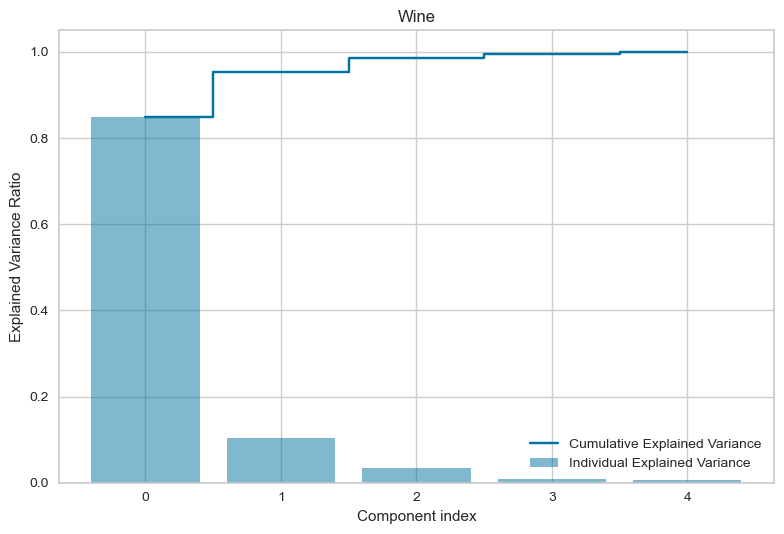

In [179]:
plt.bar(range(0,len(lda_results.explained_variance_ratio_)), lda_results.explained_variance_ratio_, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(0,len(np.cumsum(lda_results.explained_variance_ratio_))), np.cumsum(lda_results.explained_variance_ratio_), where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Component index')
plt.title('Wine')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('wineldacomponent', format='png')
plt.show()

In [224]:
%%time
lda_results = LinearDiscriminantAnalysis(n_components=5).fit(X, y)

CPU times: total: 31.2 ms
Wall time: 5 ms


In [181]:
lda_results.explained_variance_ratio_

array([0.84961759, 0.10277776, 0.03334138, 0.00864313, 0.00562015])

In [182]:
pd.DataFrame(data=lda_results.coef_, columns=X.columns).iloc[0]

fixed acidity           1.776409
volatile acidity        2.777185
citric acid             1.073412
residual sugar          0.495403
chlorides               0.933673
free sulfur dioxide     0.173331
total sulfur dioxide   -0.853496
density                -1.414580
pH                      1.747571
sulphates              -0.382718
alcohol                -1.406092
Name: 0, dtype: float64

## DR for Clustering


### PCA

#### Component Choice for PCA


In [212]:
pca_results = PCA(n_components=7).fit(X)
pca_X = pca_results.transform(X)

#### K Means

In [96]:
kmeans_pca_results = []
times = []
index = np.arange(1, 20, 1)
for i in index:
    start = time.time()
    kmeans_pca_results.append(KMeans(n_clusters=i).fit(pca_X))
    times.append(time.time() - start)

<AxesSubplot:>

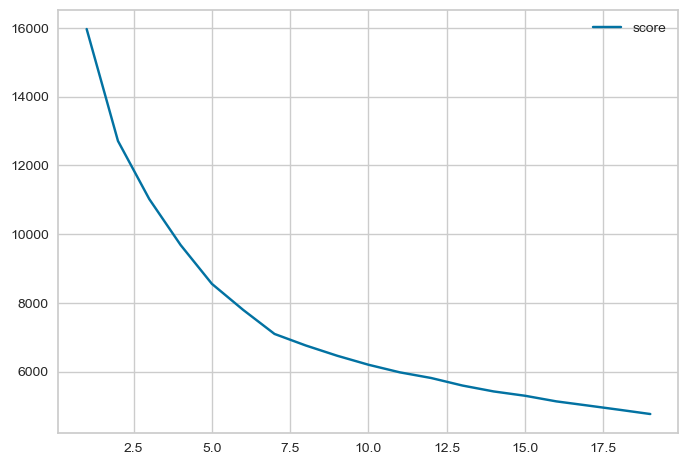

In [97]:
kmeans_pca_elbow_df = pd.DataFrame(index=index)
kmeans_pca_elbow_df['score'] = [res.inertia_ for res in kmeans_pca_results]
kmeans_pca_elbow_df.plot()

In [98]:
kmeans_silhouette_df = pd.DataFrame(index=index[1:])
kmeans_silhouette_df['score'] = [silhouette_score(pca_X, res.labels_, metric='euclidean') for res in kmeans_pca_results[1:]]

<AxesSubplot:>

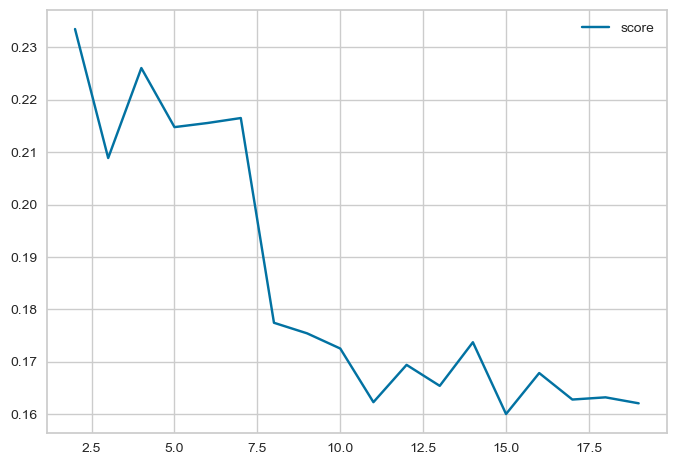

In [99]:
kmeans_silhouette_df.plot()

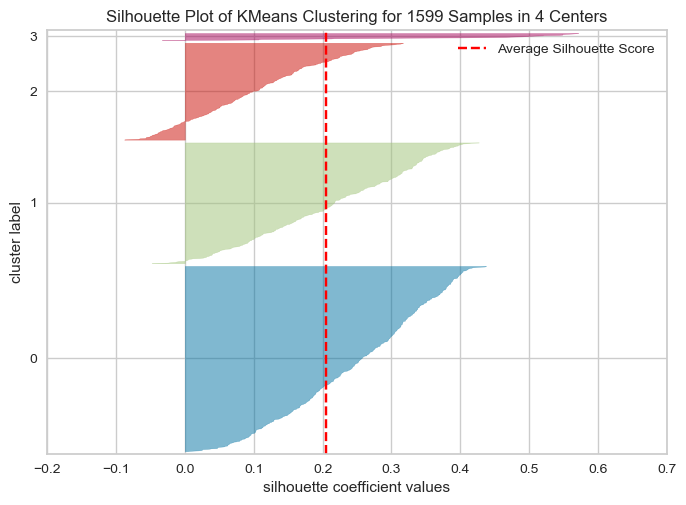

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1599 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [100]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [101]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

<AxesSubplot:>

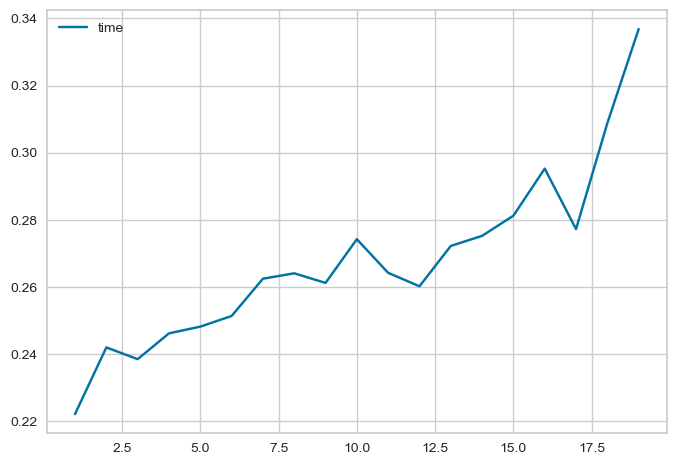

In [102]:
time_df.plot()

In [213]:
k=4

In [214]:
kmeans = KMeans(n_clusters=k).fit(pca_X)

In [215]:
kmeans_pairwise = pd.DataFrame(data=pca_X.copy())
kmeans_pairwise['kmeans_labels'] = kmeans.labels_
print(kmeans_pairwise.shape)
kmeans_pairwise.head()

(1599, 8)


,0,1,2,3,4,5,6,kmeans_labels
0,-1.619023,0.450809,-1.773899,0.043727,0.066994,-0.913635,-0.160993,3
1,-0.798920,1.855972,-0.911405,0.547895,-0.018386,0.929423,-1.009513,1
2,-0.748245,0.881763,-1.171028,0.410892,-0.043517,0.401348,-0.539385,3
3,2.356935,-0.269892,0.243413,-0.928160,-1.498680,-0.130976,0.344183,0
4,-1.619023,0.450809,-1.773899,0.043727,0.066994,-0.913635,-0.160993,3


In [216]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 0].describe()

,0,1,2,3,4,5,6,kmeans_labels
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.0
mean,1.699895,-1.089834,0.143404,-0.324670,0.010074,-0.021114,-0.105192,0.0
std,1.225010,0.868786,1.080445,0.829186,0.928989,0.767214,0.730077,0.0
min,-0.469524,-3.116712,-2.558074,-4.471436,-1.711065,-2.580270,-2.496607,0.0
25%,0.743913,-1.717241,-0.617159,-0.808982,-0.609349,-0.520261,-0.529706,0.0
50%,1.505395,-1.081582,0.142461,-0.313496,-0.110476,-0.024097,-0.110706,0.0
75%,2.571722,-0.523653,0.922457,0.064835,0.335442,0.501925,0.393475,0.0
max,5.535303,2.092877,3.377454,3.791200,6.251977,2.566428,2.921546,0.0


In [217]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 1].describe()

,0,1,2,3,4,5,6,kmeans_labels
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.0
mean,0.168328,1.592654,0.562223,-0.257564,-0.369746,0.010445,0.047164,1.0
std,1.054276,1.164638,1.171838,0.776051,1.260842,0.860694,0.807232,0.0
min,-2.589263,-0.578951,-1.777576,-3.808878,-3.047964,-2.082913,-2.503231,1.0
25%,-0.513071,0.865987,-0.215218,-0.578282,-1.083088,-0.662357,-0.404461,1.0
50%,0.095953,1.424036,0.420712,-0.244847,-0.650742,-0.005895,0.093570,1.0
75%,0.724353,2.130439,0.996435,0.124885,-0.090718,0.574882,0.454659,1.0
max,4.689206,6.807736,5.971343,3.003923,6.345129,3.264673,3.930772,1.0


In [218]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 2].describe()

,0,1,2,3,4,5,6,kmeans_labels
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0
mean,3.598270,1.054654,0.290297,5.965679,1.044624,1.028701,0.735873,2.0
std,1.264301,0.808681,1.087995,1.776836,0.752967,1.075721,1.889550,0.0
min,1.400953,-1.011299,-1.180127,3.235734,-0.035473,-1.572126,-3.425119,2.0
25%,3.070769,0.631615,-0.485589,4.544969,0.622620,0.772391,0.183478,2.0
50%,3.399420,1.303400,0.023766,6.248930,1.047153,1.115614,1.188539,2.0
75%,3.962524,1.511625,0.545205,6.769342,1.306988,1.540434,1.986534,2.0
max,8.650618,2.757465,2.719630,10.889329,3.215616,2.454753,3.562453,2.0


In [219]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 3].describe()

,0,1,2,3,4,5,6,kmeans_labels
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.0
mean,-1.399636,-0.243792,-0.441441,0.131358,0.169425,-0.033457,0.013794,3.0
std,0.980337,0.837429,1.239655,0.538267,0.719680,0.773892,0.658077,0.0
min,-5.385938,-3.416448,-3.654173,-1.670069,-1.343681,-2.857477,-2.203063,3.0
25%,-1.894769,-0.720552,-1.334427,-0.196910,-0.332941,-0.520528,-0.341710,3.0
50%,-1.344902,-0.186614,-0.642103,0.093949,0.073105,-0.023987,0.052591,3.0
75%,-0.712601,0.321828,0.292486,0.385053,0.570536,0.471238,0.422458,3.0
max,0.975097,2.359627,4.562744,3.128645,4.256305,2.958752,1.972405,3.0


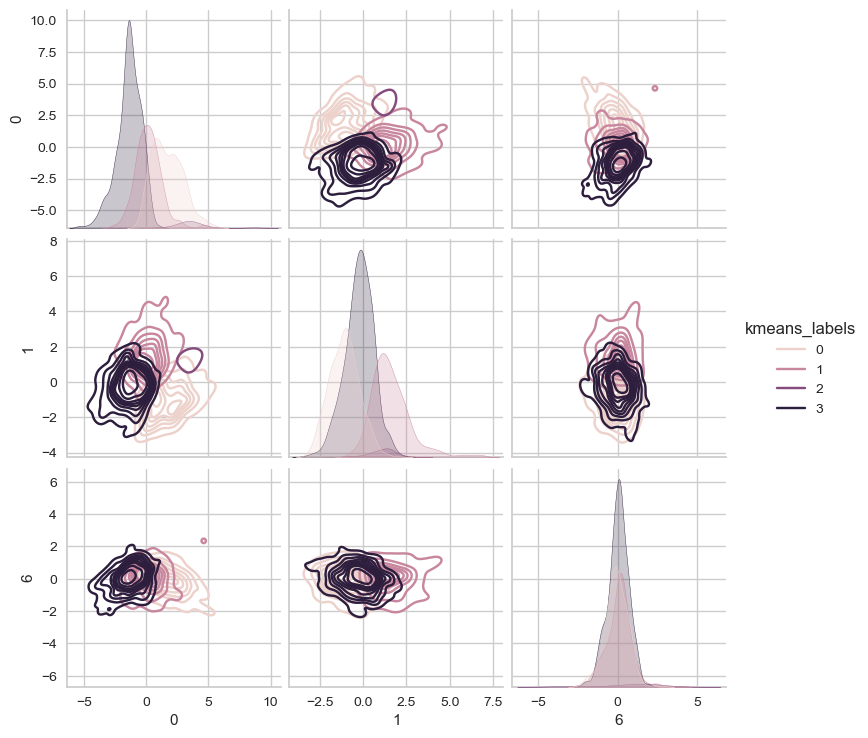

In [220]:
sns.pairplot(kmeans_pairwise[[0,1,6,'kmeans_labels']], hue='kmeans_labels', kind='kde')
plt.savefig('winepcakmeanspairwise')

#### EM

#### Component Choice
For kmeans, we are using 2 because the density on 3 clusters was very light. The elbow plot also determines that it should be 2.

In [ ]:
em_results = []
times = []
index = np.arange(1, 20, 1)
for i in index:
    start = time.time()
    em_results.append(GaussianMixture(n_components=i).fit(pca_X))
    times.append(time.time() - start)

In [ ]:
em_elbow_df = pd.DataFrame(index=index)
em_elbow_df['score'] = [res.score(pca_X) for res in em_results]

In [ ]:
em_elbow_df.plot()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot()

In [113]:
k=3

In [114]:
em_results = GaussianMixture(n_components=k).fit_predict(pca_X)
em_results

array([2, 2, 2, ..., 2, 2, 0], dtype=int64)

In [115]:
np.corrcoef(em_results, y)

array([[1.        , 0.07380518],
       [0.07380518, 1.        ]])

In [116]:
em_pairwise = pd.DataFrame(data=pca_X.copy())
em_pairwise['em_labels'] = em_results
em_pairwise.head()

,0,1,2,3,4,5,6,em_labels
0,-1.619023,0.450809,-1.773899,0.043727,0.066994,-0.913635,-0.160993,2
1,-0.798920,1.855972,-0.911405,0.547895,-0.018386,0.929423,-1.009513,2
2,-0.748245,0.881763,-1.171028,0.410892,-0.043517,0.401348,-0.539385,2
3,2.356935,-0.269892,0.243413,-0.928160,-1.498680,-0.130976,0.344183,2
4,-1.619023,0.450809,-1.773899,0.043727,0.066994,-0.913635,-0.160993,2


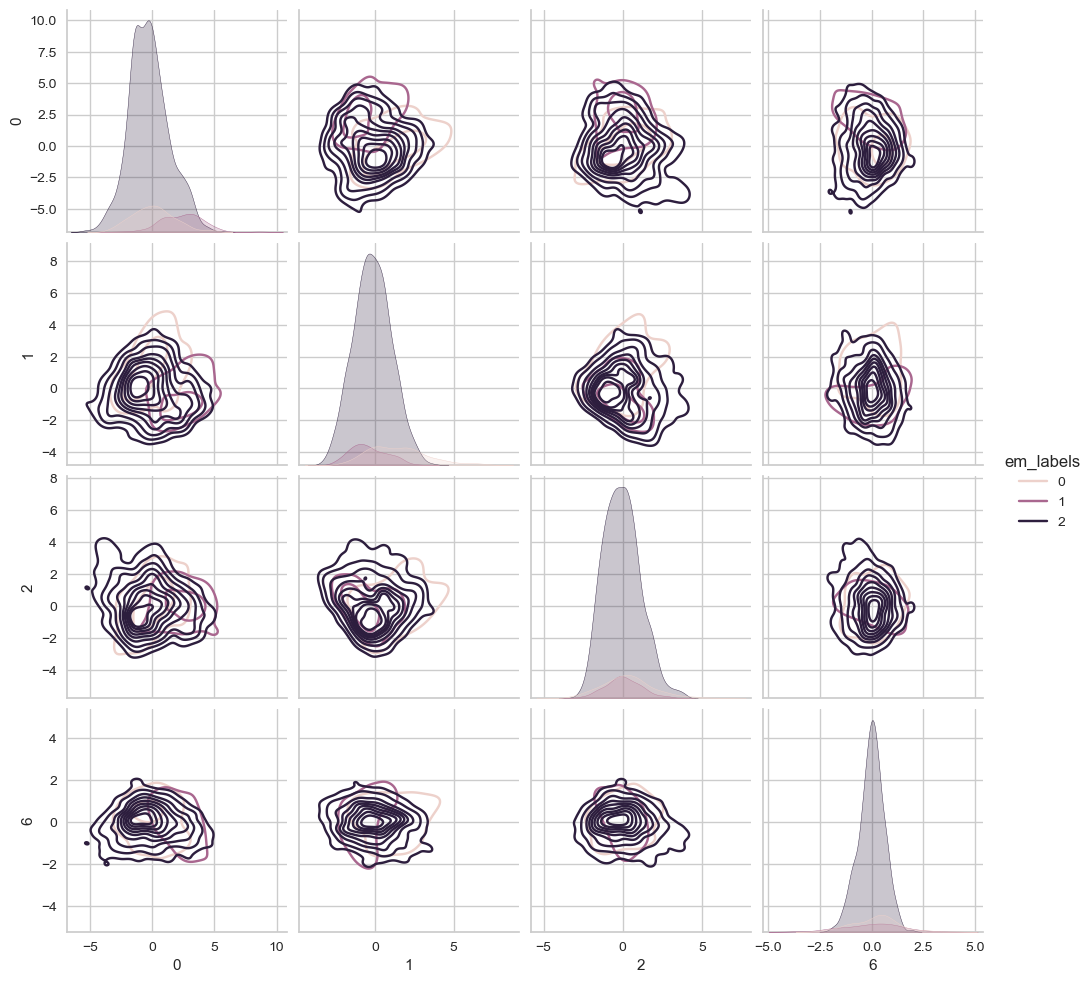

In [119]:
sns.pairplot(em_pairwise[[0,1,2,6,'em_labels']], hue='em_labels', kind='kde')
plt.savefig('winepcaempairwise')

### ICA

#### Component Choice


In [142]:
ica = FastICA(n_components=8).fit(X)
ica_X = ica.transform(X)

In [143]:
pd.DataFrame(data=ica.transform(X)).kurt()

0    45.909091
1     1.740560
2     1.276863
3    17.832231
4    -0.787292
5     3.938189
6    -0.093114
7    29.568209
dtype: float64

#### K Means

In [ ]:
kmeans_ica_results = []
times = []
index = np.arange(1, 20, 1)
for i in index:
    start = time.time()
    kmeans_ica_results.append(KMeans(n_clusters=i).fit(ica_X))
    times.append(time.time() - start)

In [ ]:
kmeans_ica_elbow_df = pd.DataFrame(index=index)
kmeans_ica_elbow_df['score'] = [res.inertia_ for res in kmeans_ica_results]

In [ ]:
kmeans_ica_elbow_df.plot()

In [ ]:
kmeans_silhouette_df = pd.DataFrame(index=index[1:])
kmeans_silhouette_df['score'] = [silhouette_score(ica_X, res.labels_, metric='euclidean') for res in kmeans_ica_results[1:]]

In [ ]:
kmeans_silhouette_df.plot()

In [ ]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot()

In [134]:
k=4 # chosen due to elbow and silhouette plot

In [135]:
kmeans = KMeans(n_clusters=k).fit(ica_X)

In [136]:
kmeans_pairwise = pd.DataFrame(data=ica_X.copy())
kmeans_pairwise['kmeans_labels'] = kmeans.labels_
print(kmeans_pairwise.shape)
kmeans_pairwise.head()

(1599, 9)


,0,1,2,3,4,5,6,7,kmeans_labels
0,-0.009982,-0.014836,-0.032853,0.000790,0.010470,0.002841,-0.034853,-0.008638,1
1,-0.000300,0.012350,-0.048058,-0.001724,-0.002474,-0.023524,0.022590,0.031230,1
2,-0.003146,0.012711,-0.036997,0.004691,0.000346,-0.008320,0.004763,0.018615,1
3,-0.016423,-0.021825,0.028172,0.034879,0.009797,0.003529,0.019384,-0.016979,2
4,-0.009982,-0.014836,-0.032853,0.000790,0.010470,0.002841,-0.034853,-0.008638,1


In [137]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 0].describe()

,0,1,2,3,4,5,6,7,kmeans_labels
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.0
mean,0.004549,0.014813,0.020135,-0.022978,0.003607,0.001522,0.004250,0.003541,0.0
std,0.030263,0.022568,0.018873,0.024316,0.011827,0.021572,0.026184,0.032442,0.0
min,-0.029635,-0.049060,-0.028593,-0.096948,-0.088585,-0.110398,-0.045120,-0.049959,0.0
25%,-0.009411,0.000878,0.003995,-0.035677,-0.000116,-0.010221,-0.010463,-0.014951,0.0
50%,-0.004212,0.018414,0.022992,-0.019809,0.005339,0.004163,0.003285,-0.000357,0.0
75%,0.002711,0.030241,0.034599,-0.006040,0.010577,0.015025,0.015290,0.016087,0.0
max,0.206848,0.081489,0.075873,0.031990,0.030955,0.046258,0.166247,0.235301,0.0


In [138]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 1].describe()

,0,1,2,3,4,5,6,7,kmeans_labels
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.0
mean,0.001121,0.002494,-0.021591,0.002835,0.001744,0.003571,0.002830,-0.000333,1.0
std,0.027574,0.021198,0.012698,0.016836,0.013323,0.023767,0.025098,0.019902,0.0
min,-0.031962,-0.073989,-0.081899,-0.069747,-0.082711,-0.101655,-0.059477,-0.048620,1.0
25%,-0.010084,-0.010944,-0.029272,-0.007404,-0.001034,-0.009115,-0.014903,-0.011048,1.0
50%,-0.005501,0.003335,-0.021007,0.004006,0.004962,0.005880,-0.000866,-0.002629,1.0
75%,0.001752,0.017858,-0.013586,0.014267,0.008707,0.018030,0.019792,0.007428,1.0
max,0.234356,0.062959,0.013945,0.065496,0.031141,0.069740,0.084161,0.138115,1.0


In [139]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 2].describe()

,0,1,2,3,4,5,6,7,kmeans_labels
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.0
mean,-0.005416,-0.016794,0.014912,0.015786,0.003143,-0.006914,-0.008037,-0.003142,2.0
std,0.012189,0.023096,0.017191,0.021898,0.011672,0.028434,0.022339,0.022262,0.0
min,-0.033245,-0.083714,-0.036045,-0.037290,-0.082619,-0.112830,-0.086516,-0.053851,2.0
25%,-0.012557,-0.032525,0.003297,-0.000367,0.000204,-0.024036,-0.020910,-0.017662,2.0
50%,-0.006819,-0.015472,0.013666,0.015063,0.005035,-0.002945,-0.006666,-0.004789,2.0
75%,-0.000061,0.001373,0.027348,0.030766,0.009368,0.014154,0.007896,0.007569,2.0
max,0.059772,0.033500,0.061823,0.092916,0.026259,0.059102,0.057189,0.101072,2.0


In [140]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 3].describe()

,0,1,2,3,4,5,6,7,kmeans_labels
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
mean,-0.004799,0.001189,0.001126,0.000869,-0.166161,0.003565,0.000814,0.010125,3.0
std,0.010651,0.015632,0.019940,0.009828,0.047128,0.017699,0.015177,0.046883,0.0
min,-0.020471,-0.028559,-0.044305,-0.017500,-0.285942,-0.029327,-0.037891,-0.082253,3.0
25%,-0.010596,-0.007546,-0.012771,-0.007850,-0.179042,-0.012259,-0.007667,-0.014951,3.0
50%,-0.006306,-0.000176,0.003152,0.001556,-0.166768,0.006355,0.000073,0.009622,3.0
75%,-0.002440,0.015244,0.011142,0.007582,-0.139201,0.014759,0.009905,0.030891,3.0
max,0.026374,0.027946,0.037990,0.021408,-0.093858,0.036158,0.027408,0.108752,3.0


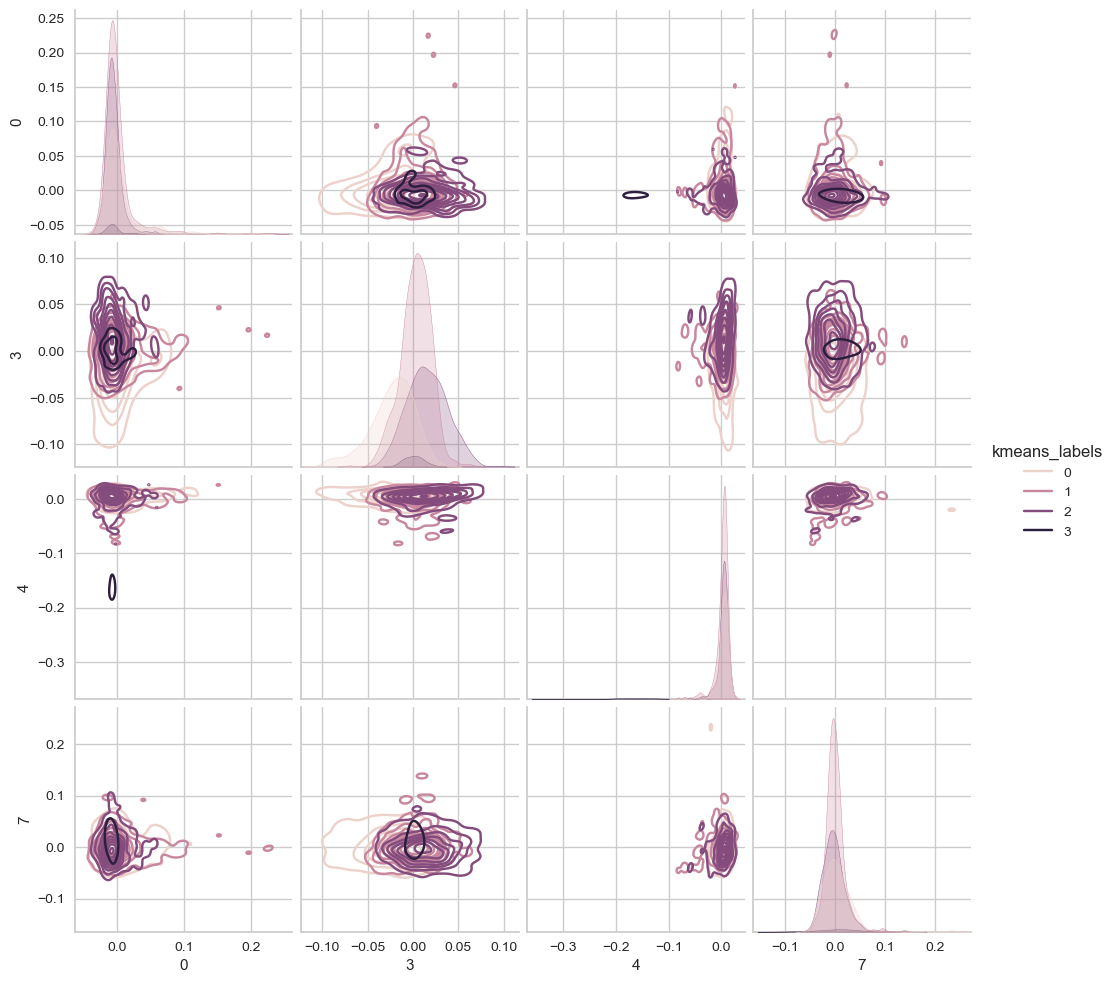

In [145]:
sns.pairplot(kmeans_pairwise[[0,3,4,7,'kmeans_labels']], hue='kmeans_labels', kind='kde')
plt.savefig('wineicakmeanspairwise')
# Note: because this is ICA and not PCA, we have thin strips because the data is not necessary orthoganal.

#### EM

In [ ]:
em_results = []
times = []
index = np.arange(1, 10, 1)
for i in index:
    start = time.time()
    em_results.append(GaussianMixture(n_components=i).fit(ica_X))
    times.append(time.time() - start)

In [ ]:
em_elbow_df = pd.DataFrame(index=index)
em_elbow_df['score'] = [res.score(ica_X) for res in em_results]

In [ ]:
em_elbow_df.plot()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot()

In [147]:
k=3

In [148]:
em_results = GaussianMixture(n_components=k).fit_predict(ica_X)
em_results

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [149]:
np.corrcoef(em_results, y)

array([[ 1.        , -0.04180832],
       [-0.04180832,  1.        ]])

In [150]:
em_pairwise = pd.DataFrame(data=ica_X.copy())
em_pairwise['em_labels'] = em_results
em_pairwise.head()

,0,1,2,3,4,5,6,7,em_labels
0,0.010590,0.002882,-0.000848,0.008629,-0.032724,-0.034842,-0.015045,0.009995,0
1,-0.002832,-0.023464,0.001633,-0.030956,-0.048296,0.022583,0.012173,0.000309,0
2,0.000131,-0.008269,-0.004751,-0.018441,-0.037143,0.004747,0.012556,0.003153,0
3,0.009995,0.003546,-0.034840,0.016708,0.028418,0.019413,-0.021656,0.016425,0
4,0.010590,0.002882,-0.000848,0.008629,-0.032724,-0.034842,-0.015045,0.009995,0


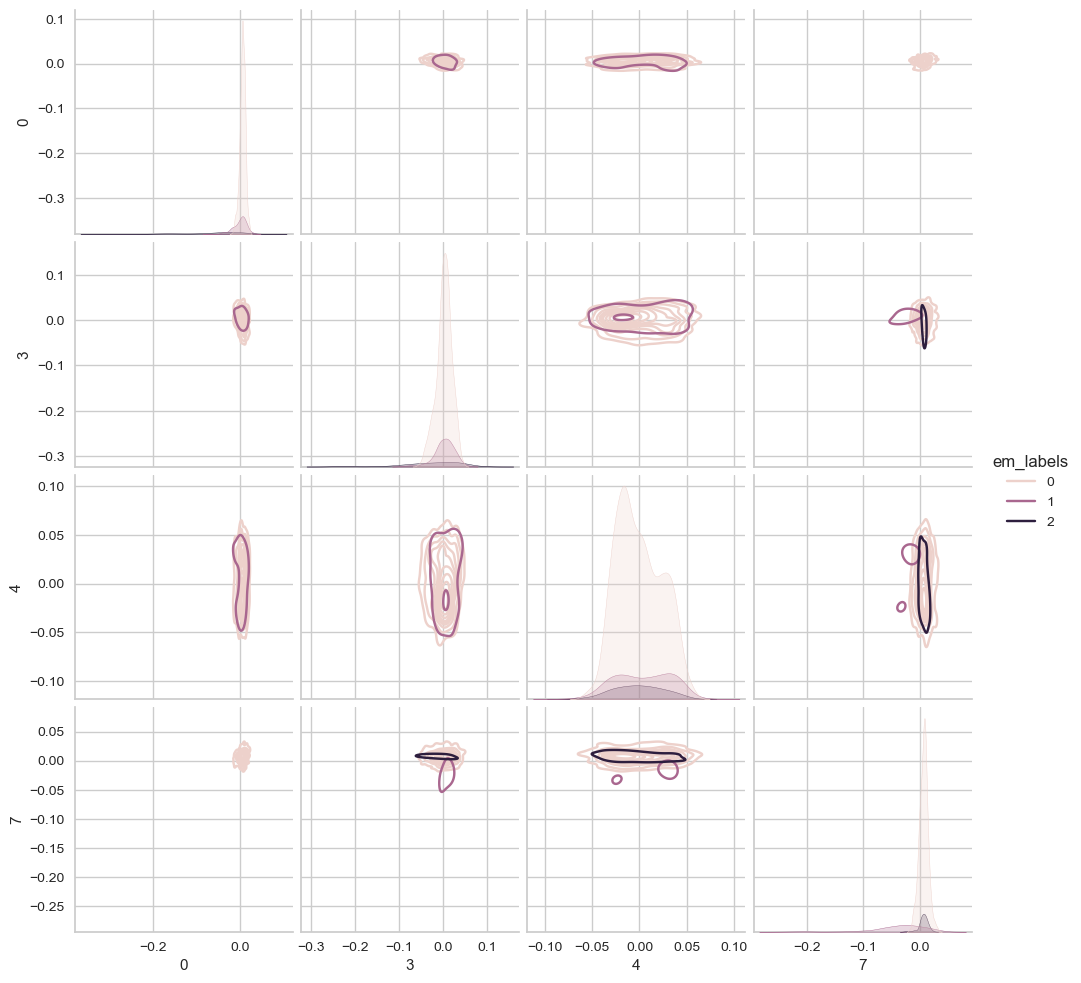

In [151]:
sns.pairplot(em_pairwise[[0,3,4,7,'em_labels']], hue='em_labels', kind='kde')
plt.savefig('wineicaempairwise')

### RP

#### Component Choices


In [157]:
rp = GaussianRandomProjection(n_components=10).fit(X)
rp_X = rp.transform(X)

#### K Means

In [158]:
kmeans_rp_results = []
times = []
index = np.arange(1, 20, 1)
for i in index:
    start = time.time()
    kmeans_rp_results.append(KMeans(n_clusters=i).fit(rp_X))
    times.append(time.time() - start)

In [ ]:
kmeans_rp_elbow_df = pd.DataFrame(index=index)
kmeans_rp_elbow_df['score'] = [res.inertia_ for res in kmeans_rp_results]

In [ ]:
kmeans_rp_elbow_df.plot()

In [ ]:
kmeans_silhouette_df = pd.DataFrame(index=index[1:])
kmeans_silhouette_df['score'] = [silhouette_score(rp_X, res.labels_, metric='euclidean') for res in kmeans_rp_results[1:]]

In [ ]:
kmeans_silhouette_df.plot()

In [ ]:
model = KMeans(2)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot()

In [163]:
k=2

In [164]:
kmeans = KMeans(n_clusters=k).fit(rp_X)

In [165]:
kmeans_pairwise = pd.DataFrame(data=rp_X.copy())
kmeans_pairwise['kmeans_labels'] = kmeans.labels_
print(kmeans_pairwise.shape)
kmeans_pairwise.head()

(1599, 11)


,0,1,2,3,4,5,6,7,8,9,kmeans_labels
0,0.174606,0.469105,0.807151,-1.103635,-0.191562,-1.505728,-0.372160,-0.204501,-0.516958,-0.918875,0
1,1.350666,-0.536548,-0.640115,0.147667,-0.033361,-1.416403,0.358117,0.436019,-0.409105,-0.357372,0
2,0.656963,0.147684,-0.088463,-0.127857,0.037996,-1.111043,0.325038,0.238744,-0.190197,-0.524026,0
3,-1.112175,-0.066965,-0.422745,-0.149656,-0.114209,2.443332,0.412622,0.484097,1.437989,0.082178,1
4,0.174606,0.469105,0.807151,-1.103635,-0.191562,-1.505728,-0.372160,-0.204501,-0.516958,-0.918875,0


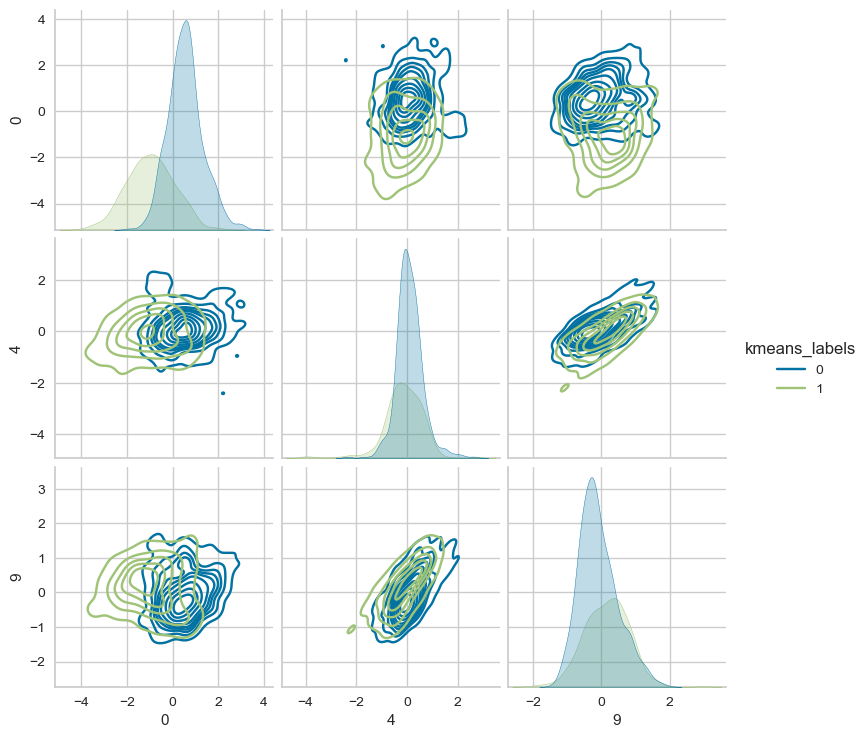

In [166]:
sns.pairplot(kmeans_pairwise[[0, 4, 9, 'kmeans_labels']], hue='kmeans_labels', kind='kde')
plt.savefig('winerpkmeanspairwise')

#### EM

In [ ]:
em_results = []
times = []
index = np.arange(1, 20, 1)
for i in index:
    start = time.time()
    em_results.append(GaussianMixture(n_components=i).fit(rp_X))
    times.append(time.time() - start)

In [ ]:
em_elbow_df = pd.DataFrame(index=index)
em_elbow_df['score'] = [res.score(rp_X) for res in em_results]

In [ ]:
em_elbow_df.plot()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot()

In [168]:
k=3

In [169]:
em_results = GaussianMixture(n_components=k).fit_predict(rp_X)
em_results

array([2, 2, 2, ..., 2, 2, 1], dtype=int64)

In [170]:
em_pairwise = pd.DataFrame(data=rp_X.copy())
em_pairwise['em_labels'] = em_results
em_pairwise.head()

,0,1,2,3,4,5,6,7,8,9,em_labels
0,0.174606,0.469105,0.807151,-1.103635,-0.191562,-1.505728,-0.372160,-0.204501,-0.516958,-0.918875,2
1,1.350666,-0.536548,-0.640115,0.147667,-0.033361,-1.416403,0.358117,0.436019,-0.409105,-0.357372,2
2,0.656963,0.147684,-0.088463,-0.127857,0.037996,-1.111043,0.325038,0.238744,-0.190197,-0.524026,2
3,-1.112175,-0.066965,-0.422745,-0.149656,-0.114209,2.443332,0.412622,0.484097,1.437989,0.082178,2
4,0.174606,0.469105,0.807151,-1.103635,-0.191562,-1.505728,-0.372160,-0.204501,-0.516958,-0.918875,2


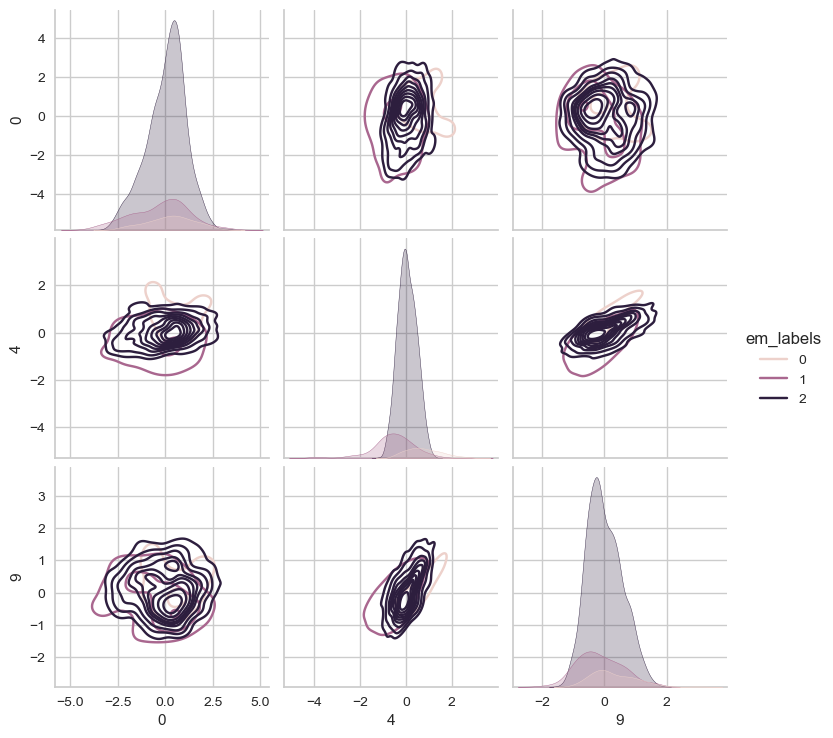

In [173]:
sns.pairplot(em_pairwise[[0, 4, 9, 'em_labels']], hue='em_labels', kind='kde')
plt.savefig('winerpempairwise')

### LDA

In [183]:
lda = LinearDiscriminantAnalysis(n_components=2).fit(X, y)
lda_X = lda.transform(X)

#### K Means

In [ ]:
kmeans_lda_results = []
times = []
index = np.arange(1, 20, 1)
for i in index:
    start = time.time()
    kmeans_lda_results.append(KMeans(n_clusters=i).fit(lda_X))
    times.append(time.time() - start)

In [ ]:
kmeans_lda_elbow_df = pd.DataFrame(index=index)
kmeans_lda_elbow_df['score'] = [res.inertia_ for res in kmeans_lda_results]

In [ ]:
kmeans_lda_elbow_df.plot()

In [ ]:
kmeans_silhouette_df = pd.DataFrame(index=index[1:])
kmeans_silhouette_df['score'] = [silhouette_score(lda_X, res.labels_, metric='euclidean') for res in kmeans_lda_results[1:]]

In [ ]:
kmeans_silhouette_df.plot()

In [ ]:
model = KMeans(2)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [ ]:
model = KMeans(3)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [ ]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot()

In [184]:
k=2

In [185]:
kmeans = KMeans(n_clusters=k).fit(lda_X)

In [186]:
kmeans_pairwise = pd.DataFrame(data=lda_X.copy())
kmeans_pairwise['kmeans_labels'] = kmeans.labels_
print(kmeans_pairwise.shape)
kmeans_pairwise.head()

(1599, 3)


,0,1,kmeans_labels
0,-1.513044,-0.530957,1
1,-1.281523,-0.405686,1
2,-1.118752,-0.135363,1
3,0.025156,0.972790,1
4,-1.513044,-0.530957,1


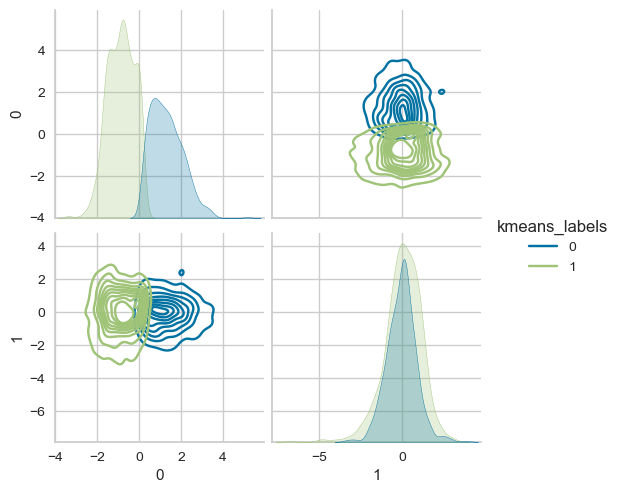

In [195]:
sns.pairplot(kmeans_pairwise, hue='kmeans_labels', kind='kde')
plt.savefig('wineldakmeanspairwise')

#### EM

In [ ]:
em_results = []
times = []
index = np.arange(1, 40, 1)
for i in index:
    start = time.time()
    em_results.append(GaussianMixture(n_components=i).fit(lda_X))
    times.append(time.time() - start)

In [ ]:
em_elbow_df = pd.DataFrame(index=index)
em_elbow_df['score'] = [res.score(lda_X) for res in em_results]

In [ ]:
em_elbow_df.plot()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot()

In [188]:
k=2

In [189]:
em_results = GaussianMixture(n_components=k).fit_predict(lda_X)
em_results

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [190]:
np.corrcoef(em_results, y)

array([[1.        , 0.51413663],
       [0.51413663, 1.        ]])

In [191]:
em_pairwise = pd.DataFrame(data=lda_X.copy())
em_pairwise['em_labels'] = em_results
em_pairwise.head()

,0,1,em_labels
0,-1.513044,-0.530957,0
1,-1.281523,-0.405686,0
2,-1.118752,-0.135363,0
3,0.025156,0.972790,0
4,-1.513044,-0.530957,0


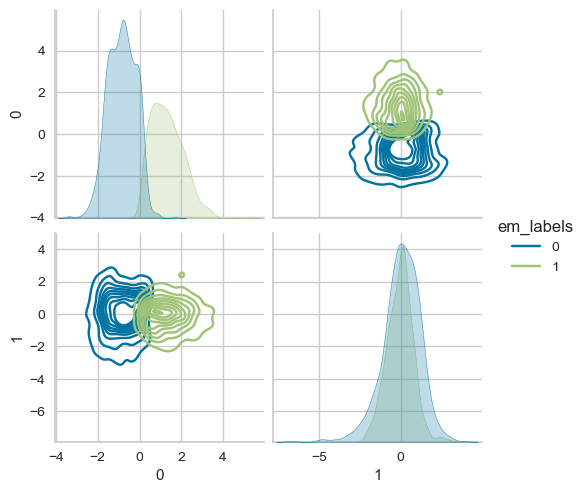

In [194]:
sns.pairplot(em_pairwise, hue='em_labels', kind='kde')
plt.savefig('wineldaempairwise')